In [1]:
import requests
import pprint
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
import shapefile as shp
import plotly.express as px

from api_keys import greater_schools_api_key


In [2]:
#parameters of the search- for practice prior to adding in csv.

city = "atlanta"
state = 'ga'
value = 10
level = 'h' #Valid values: e, m,h
school_type = "private" # Valid values: "public", "charter", "private"
limit = 50 #max 50

headers = {
  'X-API-Key': greater_schools_api_key
}


In [3]:
zipcodes_school = []

#read in the zipcode 
with open('output-data/zipcodes.csv','r') as csv_file:
    zipcodes_csv = csv.reader(csv_file, delimiter=',')
    #loop through the zipcode csv and find the schools associated with that.
    line_count = 0
    for row in zipcodes_csv:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1

        else:
            print(row)
            zipcode = int(row[1])
            url = f'https://gs-api.greatschools.org/schools?zip={zipcode}&limit={limit}&value={value}level_codes={level}'
            response = requests.request("GET", url, headers=headers)
            schools = response.json()
            zipcodes_school.append(schools)
            #print(row[1])
            #print(schools)
            
            line_count += 1

        print(f'Processed {line_count} lines.')



Column names are Zipcode, Zipcode, City, State, Distance from Origin
Processed 1 lines.
['0', '30303', 'Atlanta', 'GA', '0.0']
Processed 2 lines.
['1', '30302', 'Atlanta', 'GA', '0.25']
Processed 3 lines.
['2', '30321', 'Atlanta', 'GA', '0.25']
Processed 4 lines.
['3', '30343', 'Atlanta', 'GA', '0.25']
Processed 5 lines.
['4', '30353', 'Atlanta', 'GA', '0.25']
Processed 6 lines.
['5', '30358', 'Atlanta', 'GA', '0.25']
Processed 7 lines.
['6', '30370', 'Atlanta', 'GA', '0.25']
Processed 8 lines.
['7', '30374', 'Atlanta', 'GA', '0.25']
Processed 9 lines.
['8', '30392', 'Atlanta', 'GA', '0.25']
Processed 10 lines.
['9', '30394', 'Atlanta', 'GA', '0.25']
Processed 11 lines.
['10', '30334', 'Atlanta', 'GA', '0.27']
Processed 12 lines.
['11', '31136', 'Atlanta', 'GA', '0.51']
Processed 13 lines.
['12', '30312', 'Atlanta', 'GA', '0.73']
Processed 14 lines.
['13', '30313', 'Atlanta', 'GA', '1.12']
Processed 15 lines.
['14', '30308', 'Atlanta', 'GA', '1.53']
Processed 16 lines.
['15', '30332', 

In [4]:
#pprint.pprint(zipcodes_school)

In [5]:
zipcodes_school[0]
len(zipcodes_school)

schools_in_zipcode = []
for s in zipcodes_school:
    if s['schools']== []:
        pass
    else:
        schools_in_zipcode.append(s)

pprint.pprint(schools_in_zipcode)

[{'schools': [{'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 206,
               'district-name': 'Department Of Human Resources',
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.753963,
               'level': 'PK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
               'level-codes': 'p,e,m,h',
               'lon': -84.390221,
               'name': 'Department Of Human Resources',
               'nces-id': '130002703682',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/6754-Department-Of-Human-Resources/',
               'phone': '(404) 657-0435',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture 

                                 'measures.',
               'state': 'GA',
               'state-id': '7611208',
               'street': '211 Memorial Drive Southeast',
               'type': 'charter',
               'universal-id': '1303850',
               'web-site': 'http://wesleyacademy.org/net/content/news.aspx?s=78047.0.0.967',
               'year': 2022,
               'zip': '30312'},
              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 4,
               'district-name': 'Atlanta Public Schools',
               'fax': '(404) 525-2778',
               'fipscounty': 13121,
               'lat': 33.741283,
               'level': 'KG,1,2,3,4,5',
               'level-codes': 'e',
               'lon': -84.401283,
               'name': 'Dunbar Elementary School',
               'nces-id': '130012000054',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/52-Dunbar-Elementary-School/',
             

               'lat': 33.766655,
               'level': 'KG',
               'level-codes': 'e',
               'lon': -84.448647,
               'name': 'KIPP Soul Primary',
               'nces-id': '130012004315',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/8845-KIPP-Soul-Primary/',
               'phone': '(404) 759-6852',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include

               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.780273,
               'level': '2,3,4,5,6,7,8,9,10,11',
               'level-codes': 'e,m,h',
               'lon': -84.345589,
               'name': 'Laurel Heights Academy (Hospital)',
               'nces-id': 'A9302969',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/2149-Laurel-Heights-Academy-Hospital/',
               'phone': '(404) 888-7895',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                             

               'state-id': None,
               'street': '1015 Edgewood Avenue Northeast',
               'type': 'private',
               'universal-id': '1302273',
               'web-site': 'http://theatlantaschool.com/',
               'year': None,
               'zip': '30307'},
              {'city': 'Atlanta',
               'county': 'Fulton',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.756809,
               'level': '9,10,11,12',
               'level-codes': 'h',
               'lon': -84.354485,
               'name': 'The New School',
               'nces-id': None,
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/6957-The-New-School/',
               'phone': '(404) 500-9753',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compar

               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school perfor

               'year': None,
               'zip': '30316'},
              {'city': 'Atlanta',
               'county': 'Fulton',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.719242,
               'level': 'PK,KG,1,2,4,5,6',
               'level-codes': 'p,e',
               'lon': -84.33416,
               'name': 'New Generation Christian Academy',
               'nces-id': 'A9701310',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/2259-New-Generation-Christian-Academy/',
               'phone': '(404) 627-2344',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful pic

                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Berean Christian Jr Academy, a private '
                                 'school located in Atlanta, GA, serves grades '
                                 'K-8 in the .',
               'state': 'GA',
               'state-id': None,
               'street': '401 Hamilton E Holmes Drive Northwest',
               'type': 'private',
               'universal-id': '1303999',
               'web-site': None,
               'ye

                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Ivy Preparatory Academy- Inc, a charter '
                                 'school located in Atlanta, GA, serve

              {'city': 'Atlanta',
               'county': 'Fulton',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.731232,
               'level': 'PK,KG',
               'level-codes': 'p,e',
               'lon': -84.442101,
               'name': 'Preferred School Care-E L Connaly',
               'nces-id': None,
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/4232-Preferred-School-Care-E-L-Connaly/',
               'phone': '(404) 802-8473',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each schoo

               'lat': 33.681072,
               'level': 'PK,KG,1,2,3,4,5,6',
               'level-codes': 'p,e',
               'lon': -84.457726,
               'name': 'Christ Lutheran School',
               'nces-id': '02022077',
               'overview-url': 'https://www.greatschools.org/georgia/east-point/2046-Christ-Lutheran-School/',
               'phone': '(404) 767-2892',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                           

                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection 

               'zip': '30344'},
              {'city': 'East Point',
               'county': 'Fulton County',
               'district-id': 73,
               'district-name': 'Fulton County School District',
               'fax': '(404) 669-8079',
               'fipscounty': 13121,
               'lat': 33.678413,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.42495,
               'name': 'Parklane Elementary School',
               'nces-id': '130228000988',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/994-Parklane-Elementary-School/',
               'phone': '(470) 254-8070',
               'rating': '3',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a 

                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'The Waldorf School of Atlanta, a private '
                                 'school located in Decatur, GA, serves grades '
                                 'PK-8 in the .',
               'state': 'GA',
               'state-id': None,
               'street': '827 Kir

               'lat': 33.773762,
               'level': 'KG,1,2,3,4,5,6,7,8',
               'level-codes': 'e,m',
               'lon': -84.305664,
               'name': 'St Thomas More Catholic School',
               'nces-id': 'BB200595',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/9118-St-Thomas-More-Catholic-School/',
               'phone': '(404) 373-8456',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
             

                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Yeshiva Ohr Yisrael Of Atlanta, a private '
                                 'school located in Atlanta, GA, serves grades '
                                 '9-12 in the .',
               'state': 'GA',
               'state-id': None,
               'street': '1458 Holly Lane Northeast',
               'type': 'private',
               'universal-id': '1303977',
               'web-site': 'http://www.ohryisrael.org/',
               'year': None,
               'zip': '30329'},
              {'city': 'Atlanta',
               'county': 'DeKalb',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.809185,
        

               'overview-url': 'https://www.greatschools.org/georgia/decatur/3546-Miller-Preparatory-Academy-For/',
               'phone': '(770) 322-9097',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                              

                                 'school located in Decatur, GA, serves grades '
                                 'PK-5 in the Dekalb County School District.It '
                                 'has received a GreatSchools Rating of 2 out '
                                 'of 10, based on a variety of school quality '
                                 'measures.',
               'state': 'GA',
               'state-id': '6441101',
               'street': '1530 Joy Lane',
               'type': 'public',
               'universal-id': '1300728',
               'web-site': None,
               'year': 2022,
               'zip': '30032'},
              {'city': 'Decatur',
               'county': 'DeKalb',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.726982,
               'level': 'PK,KG',
               'level-codes': 'p,e',
               'lon': -84.289436,
            

               'school-summary': 'Briarlake Elementary School, a public school '
                                 'located in Decatur, GA, serves grades PK-5 '
                                 'in the Dekalb County School District.It has '
                                 'received a GreatSchools Rating of 7 out of '
                                 '10, based on a variety of school quality '
                                 'measures.',
               'state': 'GA',
               'state-id': '6443051',
               'street': '3590 Lavista Road',
               'type': 'public',
               'universal-id': '1300777',
               'web-site': 'http://www.briarlakepta.org/',
               'year': 2022,
               'zip': '30033'},
              {'city': 'Decatur',
               'county': 'Dekalb County',
               'district-id': 55,
               'district-name': 'Dekalb County School District',
               'fax': '(678) 676-5910',
               'fipscounty': 13089

               'county': 'Fulton County',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.888157,
               'level': 'KG,1,2,3,4,5,6',
               'level-codes': 'e',
               'lon': -84.396774,
               'name': 'The Schenck School',
               'nces-id': '00296426',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/1878-The-Schenck-School/',
               'phone': '(404) 252-2591',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                          

               'overview-url': 'https://www.greatschools.org/georgia/atlanta/1005-Westlake-High-School/',
               'phone': '(470) 254-6400',
               'rating': '7',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'att

              {'city': 'Atlanta',
               'county': 'Fulton',
               'district-id': 0,
               'district-name': None,
               'fax': '(404) 344-2466',
               'fipscounty': 13121,
               'lat': 33.699245,
               'level': 'PK,KG,1',
               'level-codes': 'p,e',
               'lon': -84.577423,
               'name': 'Angels Academy, LLC DBA Angels Academy of Atlanta',
               'nces-id': None,
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/6737-Angels-Academy-LLC-DBA-Angels-Academy-Of-Atlanta/',
               'phone': '(404) 344-2444',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
               

               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school perfor

              {'city': 'Brookhaven',
               'county': 'DeKalb',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.892548,
               'level': 'PK,KG',
               'level-codes': 'p,e',
               'lon': -84.323051,
               'name': 'Primrose School of Brookhaven',
               'nces-id': None,
               'overview-url': 'https://www.greatschools.org/georgia/brookhaven/8518-Primrose-School-Of-Brookhaven/',
               'phone': '(404) 844-9775',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school 

               'web-site': None,
               'year': None,
               'zip': '30034'},
              {'city': 'Decatur',
               'county': 'Dekalb County',
               'district-id': 55,
               'district-name': 'Dekalb County School District',
               'fax': '(678) 676-9210',
               'fipscounty': 13089,
               'lat': 33.666862,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.226479,
               'name': 'Narvie Harris Elementary School',
               'nces-id': '130174002308',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/2413-Narvie-Harris-Elementary-School/',
               'phone': '(678) 676-9202',
               'rating': '7',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school qua

                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Hawthorne Elementary School, a public school '
                                 'located in Atlanta, GA, serves 

              {'city': 'Atlanta',
               'county': 'Cobb County',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13067,
               'lat': 33.906612,
               'level': 'PK,TK,KG',
               'level-codes': 'p,e',
               'lon': -84.483704,
               'name': 'Destiny Academy',
               'nces-id': 'A0970793',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/8342-Destiny-Academy/',
               'phone': '(770) 509-9010',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
    

In [25]:
#loop through the dictionaries and lists to get to the specific values.
specific_schools = []

for schools in schools_in_zipcode:
    for key,value in schools.items():
        for s in value:
            specific_schools.append(s)

pprint.pprint(specific_schools)


[{'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 206,
  'district-name': 'Department Of Human Resources',
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.753963,
  'level': 'PK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
  'level-codes': 'p,e,m,h',
  'lon': -84.390221,
  'name': 'Department Of Human Resources',
  'nces-id': '130002703682',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/6754-Department-Of-Human-Resources/',
  'phone': '(404) 657-0435',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'read

  'universal-id': '1303025',
  'web-site': 'http://www. Kippways.org',
  'year': 2022,
  'zip': '30314'},
 {'city': 'Atlanta',
  'county': 'Fulton',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.745113,
  'level': 'PK,KG',
  'level-codes': 'p,e',
  'lon': -84.411232,
  'name': 'Mwec/Spelman College Nursery',
  'nces-id': 'A9706157',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/4314-Mwec-Spelman-College-Nursery/',
  'phone': '(404) 270-5981',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, colleg

  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Haynes Learning Center, a private school located in '
              

 {'city': 'Atlanta',
  'county': 'Fulton',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.788422,
  'level': 'PK,KG',
  'level-codes': 'p,e',
  'lon': -84.370018,
  'name': 'International Preschools and Kindergarten',
  'nces-id': None,
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/6597-International-Preschools-And-Kindergarten/',
  'phone': '(678) 705-8355',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
       

  'school-summary': 'Nur Academy, a private school located in Atlanta, GA, '
                    'serves grades PK-5 in the .',
  'state': 'GA',
  'state-id': None,
  'street': 'P.O. Box 12646',
  'type': 'private',
  'universal-id': '1302378',
  'web-site': None,
  'year': None,
  'zip': '30315'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 4,
  'district-name': 'Atlanta Public Schools',
  'fax': '(404) 624-9093',
  'fipscounty': 13121,
  'lat': 33.735703,
  'level': 'KG,1,2,3,4,5',
  'level-codes': 'e',
  'lon': -84.376099,
  'name': 'Neighborhood Charter School',
  'nces-id': '130012002615',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/2651-Neighborhood-Charter-School/',
  'phone': '(404) 624-6226',
  'rating': '7',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of

  'fipscounty': 13121,
  'lat': 33.720566,
  'level': '9,10,11,12',
  'level-codes': 'h',
  'lon': -84.387085,
  'name': 'Carver High School',
  'nces-id': '130012004223',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8741-Carver-High-School/',
  'phone': '(404) 802-4415',
  'rating': '2',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider ot

                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Bolton Academy, a public school located in Atlanta, GA, '
                    'serves grades PK-5 in the Atlanta Public Schools.It has '
                    'received a GreatSchools Rating of 6 out of 10, based on a '
                    'variety of school quality measures.',
  'state': 'GA',
  'state-id': '7610303',
  'street': '2268 Adams Drive Northwest',
  'type': 'public',
  'universal-id': '1303022',
  'web-site': 'http://www.boltonacademy.org/',
  'year': 2022,
  'zip': '30318'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id':

  'universal-id': '1300760',
  'web-site': 'http://www.briarvistaes.dekalb.k12.ga.us',
  'year': 2022,
  'zip': '30324'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.819347,
  'level': 'PK,TK,KG',
  'level-codes': 'p,e',
  'lon': -84.353569,
  'name': 'Carlisle Montessori School of Buckhead',
  'nces-id': 'A1501237',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8882-Carlisle-Montessori-School-Of-Buckhead/',
  'phone': '(404) 949-0053',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(abov

                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'The Bradley Academy, a private school located in Atlanta, '
                    'GA, serves grades PK-1 in the .',
  'state': 'GA',
  'state-id': None,
  'street': '2450 Cascade Road',
  'type': 'private',
  'universal-id': '1309120',
  'web-site': None,
  'year': None,
  'zip': '30311'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 4,
  'district-name': 'Atlanta Public School

 {'city': 'Atlanta',
  'county': 'Fulton',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.681713,
  'level': 'UG',
  'level-codes': 'e,m,h',
  'lon': -84.414864,
  'name': 'Cornerstone Community Services Learning Academy',
  'nces-id': 'A1100817',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8340-Cornerstone-Community-Services-Learning-Academy/',
  'phone': '(404) 767-0222',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced c

  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'The Waldorf School of Atlanta, a private school located '
          

  'county': 'Fulton County',
  'district-id': 73,
  'district-name': 'Fulton County School District',
  'fax': '(404) 669-8226',
  'fipscounty': 13121,
  'lat': 33.660118,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.405861,
  'name': 'Hapeville Elementary School',
  'nces-id': '130228002170',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/1035-Hapeville-Elementary-School/',
  'phone': '(470) 254-8220',
  'rating': '4',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced c

  'zip': '30329'},
 {'city': 'Brookhaven',
  'county': 'DeKalb County',
  'district-id': 55,
  'district-name': 'Dekalb County School District',
  'fax': '(678) 874-7310',
  'fipscounty': 13089,
  'lat': 33.847713,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.319969,
  'name': 'Montclair Elementary School',
  'nces-id': '130174000702',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/753-Montclair-Elementary-School/',
  'phone': '(678) 874-7302',
  'rating': '2',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                       

  'web-site': None,
  'year': 2022,
  'zip': '30032'},
 {'city': 'Decatur',
  'county': 'DeKalb',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.73468,
  'level': 'PK,KG',
  'level-codes': 'p,e',
  'lon': -84.235046,
  'name': 'All Gods Children Academy',
  'nces-id': 'A0970728',
  'overview-url': 'https://www.greatschools.org/georgia/decatur/6849-All-Gods-Children-Academy/',
  'phone': '(404) 284-8631',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress,

                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Oak Grove Young Childrens School, a private school '
                    'located in Decatur, GA, serves grades PK-K in the .',
  'state': 'GA',
  'state-id': None,
  'street': '1722 Oak Grove Rd',
  'type': 'private',
  'universal-id': '1306267',
  'web-site': None,
  'year': None,
  'zip': '30033'},
 {'city': 'Decatur',
  'county': 'DeKalb',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.84174,
  'level': '1,2,3,4,5,6,7,8',
  'level-codes': 'e,m',
  'lon': -84.263023,
  'name': 'The Cloverleaf School',


  'district-name': 'Dekalb County School District',
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.773777,
  'level': 'KG,1,2,3,4,5,6,7,8',
  'level-codes': 'e,m',
  'lon': -84.259644,
  'name': 'Museum School Avondale Estates',
  'nces-id': '130174004039',
  'overview-url': 'https://www.greatschools.org/georgia/avondale-estates/8588-Museum-School-Avondale-Estates/',
  'phone': '(404) 292-9760',
  'rating': '6',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, d

  'type': 'private',
  'universal-id': '1308468',
  'web-site': None,
  'year': None,
  'zip': '30327'},
 {'city': 'Atlanta',
  'county': 'Fulton',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.823368,
  'level': 'PK,KG',
  'level-codes': 'p,e',
  'lon': -84.409019,
  'name': 'Ahava Early Learning Center',
  'nces-id': None,
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8632-Ahava-Early-Learning-Center/',
  'phone': '(404) 603-5759',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
     

  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Southwest Atlanta Christian Academy, a private school '
            

  'level': 'KG,1,2,3,4,5',
  'level-codes': 'e',
  'lon': -84.498497,
  'name': 'Legacy Christian Academy',
  'nces-id': None,
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/6948-Legacy-Christian-Academy/',
  'phone': '(404) 505-7395',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'informa

  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.772179,
  'level': 'PK,TK,KG,1,2,3,4,5,6,7,8',
  'level-codes': 'p,e,m',
  'lon': -84.498177,
  'name': 'Imhotop Academy',
  'nces-id': 'A1301071',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8931-Imhotop-Academy/',
  'phone': '(404) 586-9595',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '


  'type': 'public',
  'universal-id': '1300447',
  'web-site': None,
  'year': 2022,
  'zip': '30288'},
 {'city': 'Conley',
  'county': 'DEKALB',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.661015,
  'level': 'KG,1,2,3,4,5,6,7,8,9,10,11,12',
  'level-codes': 'e,m,h',
  'lon': -84.327911,
  'name': 'ACT',
  'nces-id': 'BB160886',
  'overview-url': 'https://www.greatschools.org/georgia/conley/8864-ACT/',
  'phone': '(404) 549-2327',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        

                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Montgomery Elementary School, a public school located in '
                    'Brookhaven, GA, serves grades PK-5 in the Dekalb County '
                    'School District.It has received a GreatSchools Rating of '
                    '7 out of 10, based on a variety of school quality '
                    'measures.',
  'state': 'GA',
  'state-id': '6445062',
  'street': '3995 Ashford Dunwoody Rd NE',
  'type': 'public',
  'universal-id': '1300736',
  'web-site': None,
  'year': 2022,
  'zip': '30319'},
 {'city': 'Brookhaven',
  'county': 'DeKalb County',
  'district-id': 55,
  'district-name': 'Dekalb County School District',
  'fax': '(678) 874-6110',
  'fipscounty': 13089,
  'lat': 33.843887,
  'level': '9,10,11,12',
  'level-codes': 'h',
  'lon': -84.337982,
  'nam

  'overview-url': 'https://www.greatschools.org/georgia/college-park/1014-College-Park-Elementary-School/',
  'phone': '(470) 254-8040',
  'rating': '2',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school s

  'county': 'Dekalb County',
  'district-id': 55,
  'district-name': 'Dekalb County School District',
  'fax': '(678) 874-4210',
  'fipscounty': 13089,
  'lat': 33.687138,
  'level': '6,7,8',
  'level-codes': 'm',
  'lon': -84.295601,
  'name': 'Cedar Grove Middle School',
  'nces-id': '130174002310',
  'overview-url': 'https://www.greatschools.org/georgia/decatur/2415-Cedar-Grove-Middle-School/',
  'phone': '(678) 874-4202',
  'rating': '3',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
      

                    'School District.It has received a GreatSchools Rating of '
                    '5 out of 10, based on a variety of school quality '
                    'measures.',
  'state': 'GA',
  'state-id': '6441053',
  'street': '3536 Radcliffe Boulevard',
  'type': 'public',
  'universal-id': '1300712',
  'web-site': None,
  'year': 2022,
  'zip': '30034'},
 {'city': 'Decatur',
  'county': 'Dekalb County',
  'district-id': 55,
  'district-name': 'Dekalb County School District',
  'fax': '(678) 874-1910',
  'fipscounty': 13089,
  'lat': 33.70158,
  'level': '9,10,11,12',
  'level-codes': 'h',
  'lon': -84.225906,
  'name': 'Southwest Dekalb High School',
  'nces-id': '130174000679',
  'overview-url': 'https://www.greatschools.org/georgia/decatur/733-Southwest-Dekalb-High-School/',
  'phone': '(678) 874-1902',
  'rating': '4',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school q

  'phone': '(678) 874-2802',
  'rating': '6',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Hawthorne Elementary School, a public sc

  'district-name': 'Fulton County School District',
  'fax': '(470) 254-3294',
  'fipscounty': 13121,
  'lat': 33.899052,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.37014,
  'name': 'High Point Elementary School',
  'nces-id': '130228001026',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/1004-High-Point-Elementary-School/',
  'phone': '(470) 254-7716',
  'rating': '6',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discip

  'universal-id': '1301023',
  'web-site': None,
  'year': 2022,
  'zip': '30339'},
 {'city': 'Atlanta',
  'county': 'Cobb County',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13067,
  'lat': 33.906612,
  'level': 'PK,TK,KG',
  'level-codes': 'p,e',
  'lon': -84.483704,
  'name': 'Destiny Academy',
  'nces-id': 'A0970793',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8342-Destiny-Academy/',
  'phone': '(770) 509-9010',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, 

In [26]:
zipcode_schools_df = pd.DataFrame(specific_schools)
zipcode_schools_df['lat_lon'] = list(zip(zipcode_schools_df["lat"], zipcode_schools_df["lon"]))

zipcode_schools_df.head()

,universal-id,nces-id,state-id,name,school-summary,type,level-codes,level,street,city,...,lat,lon,district-name,district-id,web-site,overview-url,rating,year,rating-description,lat_lon
0,1306754,130002703682,8920198,Department Of Human Resources,"Department Of Human Resources, a public school...",public,"p,e,m,h","PK,KG,1,2,3,4,5,6,7,8,9,10,11,12",2 Peachtree Street Northwest,Atlanta,...,33.753963,-84.390221,Department Of Human Resources,206,http://www.dhr.state.ga.us,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.753963, -84.390221)"
1,1306933,130023104095,78201190119,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,Atlanta,...,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250,gradgeorgia.com,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.760502, -84.387169)"
2,1308742,130228004261,6601321,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,Atlanta,...,33.754742,-84.385574,Fulton County School District,73,None,https://www.greatschools.org/georgia/atlanta/8...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.754742, -84.385574)"
3,1309128,A1901569,None,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,Atlanta,...,33.749504,-84.392090,None,0,None,https://www.greatschools.org/georgia/atlanta/9...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.749504, -84.39209)"
4,3300946,A0302043,None,Longview School,"Longview School, a private school located in D...",private,h,"9,10,11,12",PO BOX 369,Deerfield,...,43.193851,-71.572395,None,0,None,https://www.greatschools.org/new-hampshire/dee...,None,NaN,The GreatSchools Rating helps parents compare ...,"(43.193851, -71.572395)"


In [52]:
#zipcode_schools_df.columns
zipcode_schools_df.describe()


,fipscounty,lat,lon,district-id,year
count,390.000000,390.000000,390.000000,390.000000,174.000000
mean,13107.641026,33.762333,-84.374575,19.158974,2021.977011
std,16.352460,0.066548,0.080398,41.364458,0.213802
min,13063.000000,33.637798,-84.580475,0.000000,2020.000000
25%,13089.000000,33.711718,-84.434427,0.000000,2022.000000
50%,13121.000000,33.755436,-84.372901,0.000000,2022.000000
75%,13121.000000,33.809874,-84.308760,4.000000,2022.000000
max,13121.000000,34.003845,-84.207146,270.000000,2022.000000


In [53]:
#move the zipcode to the first column
temp_cols = zipcode_schools_df.columns.tolist()
#print(temp_cols)
index=zipcode_schools_df.columns.get_loc("zip")
#print(index)
# shift column 'Name' to first position
first_column = zipcode_schools_df.pop('zip')
  
# insert column using insert(position,column_name,
# first_column) function
zipcode_schools_df.insert(0, 'zip', first_column)
zipcode_schools_df.drop(zipcode_schools_df.index[(zipcode_schools_df["state"] == "NH")],axis=0,inplace=True)
  
zipcode_schools_df.head()
    


,zip,universal-id,nces-id,state-id,name,school-summary,type,level-codes,level,street,...,lat,lon,district-name,district-id,web-site,overview-url,rating,year,rating-description,lat_lon
1,30303,1306933,130023104095,78201190119,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,...,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250,gradgeorgia.com,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.760502, -84.387169)"
2,30303,1308742,130228004261,6601321,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,...,33.754742,-84.385574,Fulton County School District,73,None,https://www.greatschools.org/georgia/atlanta/8...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.754742, -84.385574)"
3,30303,1309128,A1901569,None,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,...,33.749504,-84.392090,None,0,None,https://www.greatschools.org/georgia/atlanta/9...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.749504, -84.39209)"
5,30334,1306660,None,None,K12 International Academy,"K12 International Academy , a private school l...",private,"e,m,h","KG,1,2,3,4,5,6,7,8,9,10,11,12",205 Jesse Hill Jr. Drive SE,...,33.749733,-84.385696,None,0,http://ww2.k12.com/cm/?affl=gr8t&page=sp&schoo...,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.749733, -84.385696)"
6,30334,1306661,None,None,The Keystone School,"The Keystone School , a private school located...",private,"m,h","6,7,8,9,10,11,12",205 Jesse Hill Jr. Drive SE,...,33.749733,-84.385696,None,0,http://keystoneschoolonline.com/,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...,"(33.749733, -84.385696)"


In [54]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = zipcode_schools_df[zipcode_schools_df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,zip,universal-id,nces-id,state-id,name,school-summary,type,level-codes,level,street,...,lat,lon,district-name,district-id,web-site,overview-url,rating,year,rating-description,lat_lon


In [55]:
zipcode_schools_df = zipcode_schools_df.drop([0])
#zipcode_schools_df

KeyError: '[0] not found in axis'

In [62]:
zipcode_schools_df_copy = zipcode_schools_df.copy()
zipcode_schools_df['level-codes'].unique()
levels_schools = ['p,e', 'm', 'e,m', 'e', 'p,e,m',]
zipcode_schools_df.drop(zipcode_schools_df[zipcode_schools_df['level-codes'].isin(levels_schools) ].index, inplace = True)
zipcode_schools_df.count()


zip                   99
universal-id          99
nces-id               91
state-id              37
name                  99
school-summary        99
type                  99
level-codes           99
level                 99
street                99
city                  99
state                 99
fipscounty            99
phone                 98
fax                   28
county                99
lat                   99
lon                   99
district-name         37
district-id           99
web-site              45
overview-url          99
rating                28
year                  29
rating-description    99
lat_lon               99
dtype: int64

In [63]:
# selecting rows based on condition of only in GA
print(zipcode_schools_df['name']) 



1      Graduation Achievement Center Charter High School
2                                      Wellspring Living
3                             The Life School of Atlanta
5                             K12 International Academy 
6                                   The Keystone School 
                             ...                        
374                                 Lakeside High School
377                                Abm Vietnamese School
382                          Yeshiva Atlanta High School
383                                  The Galloway School
385                North Metro Psychoeducational Program
Name: name, Length: 99, dtype: object


In [64]:
#use Cleaned for ratings information and other areas necessary.

cleaned_zipcode_df = zipcode_schools_df.dropna(inplace=False)
cleaned_zipcode_df.shape


(12, 26)

In [65]:
#get shape of df
zipcode_schools_df.shape


(99, 26)

In [66]:
#zipcode_schools_df.count()

In [67]:
#school_by_zip_df = school_by_zip_df.fillna('')
zipcode_schools_df['type'].value_counts()


private    62
public     32
charter     5
Name: type, dtype: int64

In [68]:
rating_sort = cleaned_zipcode_df['rating'].sort_values(ascending=False)
rating_sort
rating = cleaned_zipcode_df['rating'].unique()
#rating

In [69]:
#'zip', 'name', 'school-summary','type', 'level-codes', 'level', 'street', 'city', 'state', 'phone',  'county', 'lat', 'lon', 'district-name', 'district-id', 'rating', 'year', 'rating-description'

df = zipcode_schools_df[['zip', 'name', 'school-summary','type', 
                         'level-codes', 'level', 'street', 'city', 
                         'state', 'phone',  'county', 'lat', 'lon', 
                         'district-name', 'district-id', 'rating', 'lat_lon']]
df.head()

,zip,name,school-summary,type,level-codes,level,street,city,state,phone,county,lat,lon,district-name,district-id,rating,lat_lon
1,30303,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,Atlanta,GA,(844) 776-8678,Fulton,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250,None,"(33.760502, -84.387169)"
2,30303,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,Atlanta,GA,(678) 246-9998,Fulton County,33.754742,-84.385574,Fulton County School District,73,None,"(33.754742, -84.385574)"
3,30303,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,Atlanta,GA,(404) 343-0064,Fulton County,33.749504,-84.392090,None,0,None,"(33.749504, -84.39209)"
5,30334,K12 International Academy,"K12 International Academy , a private school l...",private,"e,m,h","KG,1,2,3,4,5,6,7,8,9,10,11,12",205 Jesse Hill Jr. Drive SE,Atlanta,GA,(877) 512-7748,Fulton,33.749733,-84.385696,None,0,None,"(33.749733, -84.385696)"
6,30334,The Keystone School,"The Keystone School , a private school located...",private,"m,h","6,7,8,9,10,11,12",205 Jesse Hill Jr. Drive SE,Atlanta,GA,(800) 255-4937,Fulton,33.749733,-84.385696,None,0,None,"(33.749733, -84.385696)"


In [70]:
#Make variables to use for looping through data.
lon = df['lon'] #x
lat = df['lat'] #y
name = df['name']
lat_lon = df['lat_lon']
#print(lat_lon)


In [71]:
#Ratings from Niche-- niche sells their data for $9.99 a spreadsheet.
x = 0
for n in df['name']:
    print(n)
    rate = input("Rate: ")
    df.loc[x,'new rating'] = rate
    x += 1
    

Graduation Achievement Center Charter High School
Rate: n/a


/var/folders/zf/1q8xty857g31mrxsgrry1mlr0000gn/T/ipykernel_5298/162178471.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[x,'new rating'] = rate


Wellspring Living
Rate: n/a
The Life School of Atlanta
Rate: n/a
K12 International Academy 
Rate: B-
The Keystone School 
Rate: n/a
The New School
Rate: C+
The New School Atlanta
Rate: A+
Cristo Rey Atlanta Jesuit High School
Rate: B-
KIPP Atlanta Collegiate
Rate: C+
Booker T. Washington High School
Rate: B-
Bright Futures Academy
Rate: C+
Heavenly Institute Of Learning
Rate: n/a
Tamu S. Kanyama Prep Academy
Rate: n/a
Laurel Heights Academy (Hospital)
Rate: n/a
Uhs Of Laurel Heights
Rate: n/a
Hillside Conant School
Rate: n/a
Midtown High School
Rate: A+
Paideia School
Rate: A+
Horizons School
Rate: n/a
The New School
Rate: A-
Druid Hills High School
Rate: A-
Aps-Forrest Hills Academey
Rate: n/a
Early College High School At Carver
Rate: C+
School Of Technology At Carver
Rate: n/a
Carver High School
Rate: A-
Maynard H. Jackson- Jr. High School
Rate: n/a
Mohammed Schools Of Atlanta
Rate: B+
Clara Mohammed Elementary/W. D
Rate: n/a
Light of the World of Atlanta
Rate: n/a
Braddy Preparatory

In [73]:
df.head()

,zip,name,school-summary,type,level-codes,level,street,city,state,phone,county,lat,lon,district-name,district-id,rating,lat_lon,new rating
1,30303,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,Atlanta,GA,(844) 776-8678,Fulton,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250.0,None,"(33.760502, -84.387169)",n/a
2,30303,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,Atlanta,GA,(678) 246-9998,Fulton County,33.754742,-84.385574,Fulton County School District,73.0,None,"(33.754742, -84.385574)",n/a
3,30303,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,Atlanta,GA,(404) 343-0064,Fulton County,33.749504,-84.392090,None,0.0,None,"(33.749504, -84.39209)",B-
5,30334,K12 International Academy,"K12 International Academy , a private school l...",private,"e,m,h","KG,1,2,3,4,5,6,7,8,9,10,11,12",205 Jesse Hill Jr. Drive SE,Atlanta,GA,(877) 512-7748,Fulton,33.749733,-84.385696,None,0.0,None,"(33.749733, -84.385696)",C+
6,30334,The Keystone School,"The Keystone School , a private school located...",private,"m,h","6,7,8,9,10,11,12",205 Jesse Hill Jr. Drive SE,Atlanta,GA,(800) 255-4937,Fulton,33.749733,-84.385696,None,0.0,None,"(33.749733, -84.385696)",A+


In [72]:
zipcode_schools_df.to_csv('output-data/schools_per_zipcode.csv')

In [74]:
df.to_csv('output-data/schools_rated-per-zipcode.csv')

In [48]:
df.head()

,zip,name,school-summary,type,level-codes,level,street,city,state,phone,county,lat,lon,district-name,district-id,rating,lat_lon,new rating
1,30303,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,Atlanta,GA,(844) 776-8678,Fulton,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250.0,35th,"(33.760502, -84.387169)",NaN
2,30303,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,Atlanta,GA,(678) 246-9998,Fulton County,33.754742,-84.385574,Fulton County School District,73.0,35th,"(33.754742, -84.385574)",NaN
3,30303,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,Atlanta,GA,(404) 343-0064,Fulton County,33.749504,-84.392090,None,0.0,35th,"(33.749504, -84.39209)",NaN
5,30334,K12 International Academy,"K12 International Academy , a private school l...",private,"e,m,h","KG,1,2,3,4,5,6,7,8,9,10,11,12",205 Jesse Hill Jr. Drive SE,Atlanta,GA,(877) 512-7748,Fulton,33.749733,-84.385696,None,0.0,35th,"(33.749733, -84.385696)",NaN
6,30334,The Keystone School,"The Keystone School , a private school located...",private,"m,h","6,7,8,9,10,11,12",205 Jesse Hill Jr. Drive SE,Atlanta,GA,(800) 255-4937,Fulton,33.749733,-84.385696,None,0.0,35th,"(33.749733, -84.385696)",NaN


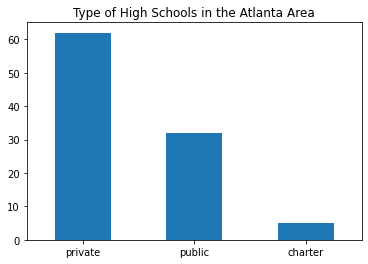

In [85]:
zipcode_schools_df['type'].value_counts().plot(kind='bar',stacked=True, rot=0)
plt.title("Type of High Schools in the Atlanta Area")
plt.savefig("output-data/types_of_schools.png")
plt.show()

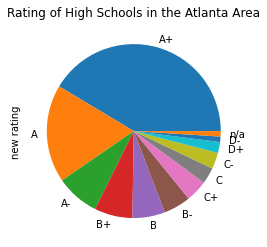

In [93]:
#Evaluation of school ratings from niche.
labels = ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D-','n/a']

df.sort_values('new rating', ascending=False)
df['new rating'].value_counts().plot(kind='pie',labels=labels)
plt.title("Rating of High Schools in the Atlanta Area")
plt.savefig("output-data/Ratings_of_schools.png")

plt.show()

In [97]:
atl_map = gpd.read_file('mygeodata/border_level8_polygon.shp')
atl_map = atl_map.to_crs("EPSG:4326")


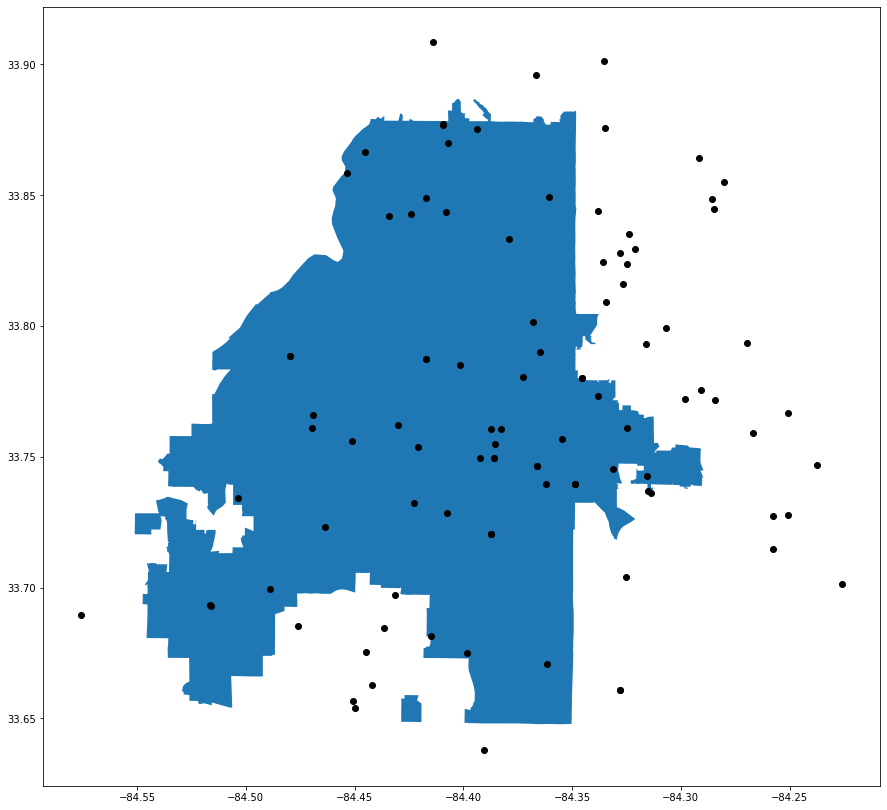

In [102]:
x_points = []
y_points = []
#multiple layers

#plot the cities polygons with no fill color
atl_map.plot(alpha=1,figsize=(15,15))
#atl_map.plot()

#loop through latitude and longitude points and parse tuple
for i in lat_lon:
    y_points.append(i[0])
    x_points.append(i[1])
    
plt.scatter(x_points, y_points,c='black')
#print(len(x_points))
#print(len(y_points))
plt.show()

70
70


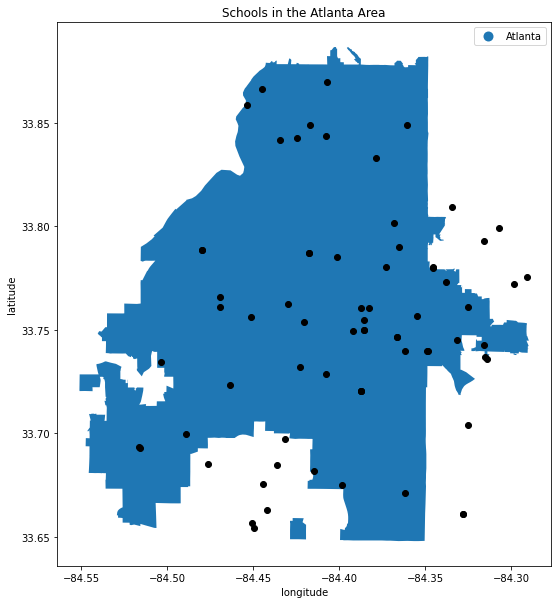

In [110]:
x_points = []
y_points = []
name = []
#multiple layers

#plot the cities polygons with no fill color
atl_map.plot(alpha=1,figsize=(10,10),column='name', legend=True)
#ax = atl_map.plot(ax=ax, column='name', legend=True)
for i in lat_lon:
    if i[0]>=33.87 or i[0]<=33.65:
        pass
    elif i[1]>=-84.29 or i[1]<-84.55:
        pass
    elif i[0]>=33.81 and i[1]>=-84.35:
        pass
    else:
        y_points.append(i[0])
        x_points.append(i[1])
    
schools = plt.scatter(x_points, y_points,c='black')
plt.title('Schools in the Atlanta Area');
plt.xlabel('longitude')
plt.ylabel('latitude')
print(len(x_points))
print(len(y_points))
plt.savefig("output-data/atlanta_schools.jpg")
plt.show()